<a href="https://colab.research.google.com/github/VictorHaBarra/ABX-CP2-IA/blob/main/ABXDesafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações de bibliotecas.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importação do dataframe & Analise de dados.

In [121]:
data = pd.read_csv("solicitacoescredito.csv")

In [122]:
data.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [123]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [124]:
#Quantidade de dados unicos
data.nunique()

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [125]:
#Verificação da media de atraso em dias
media = data['maiorAtraso'].mean()
print(f"A média da coluna é: {media:.0f}")

A média da coluna é: 25


# Tratando dos dados.

**Conferindo colunas e as modificando para melhor analise**

In [126]:
data.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [127]:
data = pd.read_csv('solicitacoescredito.csv')

In [128]:
def classificacao_pontualidade(score):
    if score < 0.5:
        return "Não confiável"
    elif score < 0.65:
        return "Cautela"
    else:
        return "Confiável"
data['classificacao_pontualidade'] = data['scorePontualidade'].apply(classificacao_pontualidade)

def classificacao_risco(score):
    if score < 0.10:
        return "Risco minimo"
    elif score < 0.40:
        return "Risco baixo"
    elif score < 0.50:
        return "Risco médio"
    elif score < 0.85:
        return "Risco alto"
    else:
        return "Risco muito alto"
data['classificacao_risco'] = data['percentualRisco'].apply(classificacao_risco)

In [131]:
print(data[['classificacao_pontualidade', 'classificacao_risco']].head(5))

  classificacao_pontualidade classificacao_risco
0                  Confiável         Risco baixo
1              Não confiável        Risco minimo
2                  Confiável         Risco baixo
3              Não confiável          Risco alto
4                  Confiável         Risco baixo


In [132]:
def Grupos(row):
    if row['classificacao_pontualidade'] in ["Confiável"] and row['classificacao_risco'] in ["Risco minimo", "Risco baixo"] and row['maiorAtraso'] < 15:
        return "Confiável"
    elif row['classificacao_pontualidade'] in ["Mediano"] and row['classificacao_risco'] in ["Risco medio"] and row['maiorAtraso'] < 23:
          return "Analisar"
    else:
        return "Não confiável"


data['Grupos'] = data.apply(Grupos, axis=1)
print(data[['Grupos']])

             Grupos
0         Confiável
1     Não confiável
2         Confiável
3     Não confiável
4     Não confiável
...             ...
8968  Não confiável
8969  Não confiável
8970      Confiável
8971      Confiável
8972      Confiável

[8973 rows x 1 columns]


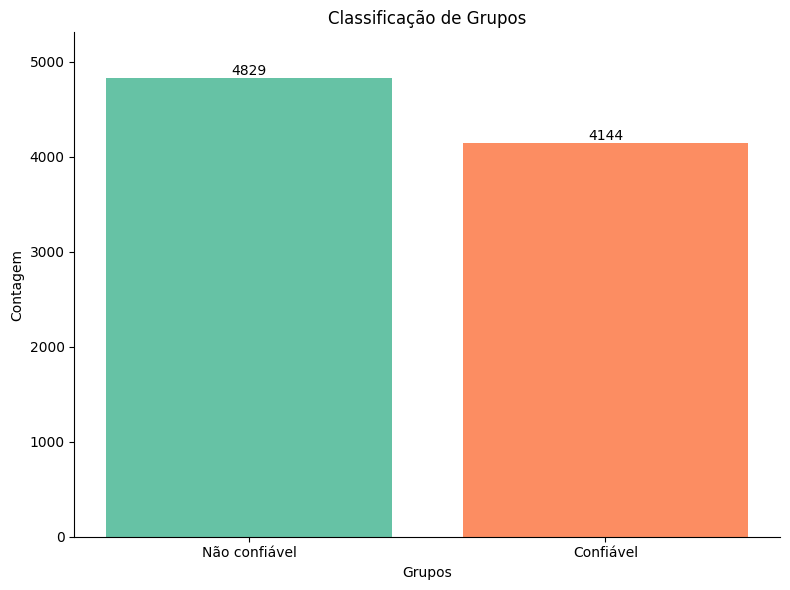

In [134]:
data['Grupos'] = data.apply(Grupos, axis=1)

# Contando as ocorrências de cada categoria
grupo_counts = data['Grupos'].value_counts()

# Cores personalizadas para os grupos
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(grupo_counts.index, grupo_counts.values, color=colors)

# Adicionando rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.1, height, ha='center', va='bottom')

plt.title('Classificação de Grupos')
plt.xlabel('Grupos')
plt.ylabel('Contagem')

# Personalizando o eixo y
plt.ylim(0, max(grupo_counts.values) * 1.1)

# Removendo bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Modelo



In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


print("Grupos Quantitativo:")
print(data['Grupos'].value_counts())
features = ['scorePontualidade', 'percentualRisco', 'maiorAtraso']
target = 'Grupos'


X = data[features]
y = data[target]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo os rótulos das classes em números
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Configurando e treinando o modelo SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train_encoded)

# Fazendo previsões no conjunto de teste
y_pred_encoded = model.predict(X_test)

# Calculando a acurácia do modelo nos grupos originais
accuracy_original = accuracy_score(y_test_encoded, y_pred_encoded)
print("Acuracia com grupos originais:", accuracy_original)

# Lista de novos clientes com suas características
new_clientes = [
    [0.6, 0.3, 15],
    [0.9, 0.1, 5],
    [0.4, 0.6, 20],
    [0.7, 0.1, 9],
    [0.85, 0.5, 2],
]

# Previsão dos grupos para os novos clientes
grupos_previstos = model.predict(new_clientes)

# Exibir as previsões
print("Previsões:")
for i, cliente in enumerate(new_clientes):
    print(f"Cliente {i+1}: {label_encoder.inverse_transform([grupos_previstos[i]])[0]}")

#Resultado original
y_novos = ["Não confiável", "Confiável", "Não confiável", "Confiável", "Confiável"]

# Calculando a acurácia do modelo nos grupos previstos para os novos clientes
accuracy_novos = accuracy_score(y_novos, label_encoder.inverse_transform(grupos_previstos))
print("Acuracia com grupos novos:", accuracy_novos)


Grupos Quantitativo:
Grupos
Não confiável    4829
Confiável        4144
Name: count, dtype: int64
Acuracia com grupos originais: 0.935933147632312
Previsões:
Cliente 1: Não confiável
Cliente 2: Confiável
Cliente 3: Não confiável
Cliente 4: Confiável
Cliente 5: Não confiável
Acuracia com grupos novos: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
